# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [6]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)
!pip install scikit-image
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 

   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.9 MB 4.8 MB/s eta 0:00:03
   ----- ---------------------------------- 1.8/12.9 MB 4.8 MB/s eta 0:00:03
   -------- ------------------------------- 2.9/12.9 MB 4.8 MB/s eta 0:00:03
   ------------ --------------------------- 3.9/12.9 MB 5.0 MB/s eta 0:00:02
   ---------------- ----------------------- 5.2/12.9 MB 5.2 MB/s eta 0:00:02
   -------------------- ------------------- 6.6/12.9 MB 5.4 MB/s eta 0:00:02
   ------------------------- -------------- 8.1/12.9 MB 5.6 MB/s eta 0:00:01
   ----------------------------- ---------- 9.4/12.9 MB 5.7 MB/s eta 0:00:01
   --------------------------------- ------ 10.7/12.9 MB 5.7 MB/s eta 0:00:01
   ------------------------------------- -- 12.1/12.9 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 5.8 MB/s  0:00:02
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   -----------

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

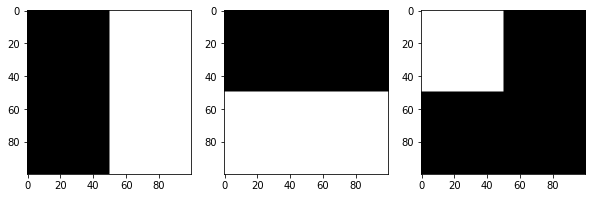

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


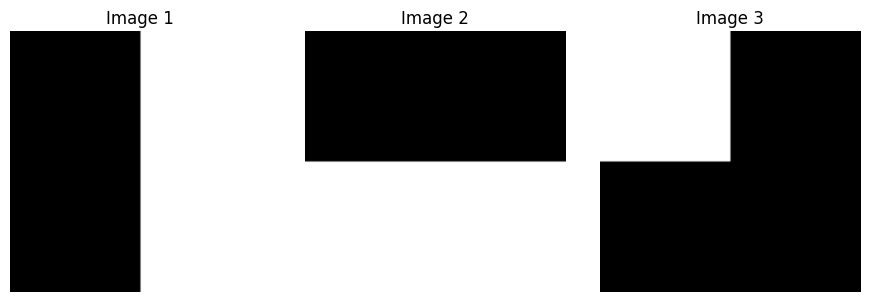

In [7]:
# Size of the artificial image
h, w = 100, 100


# 1) Right white half

img1 = np.zeros((h, w))
img1[:, 50:] = 1  


# 2) Bottom white horizontal stripe

img2 = np.zeros((h, w))
img2[50:, :] = 1  


# 3) White square in the top left corner

img3 = np.zeros((h, w))
img3[:50, :50] = 1  


# 4) VISUALIZATION
fig, ax = plt.subplots(1, 3, figsize=(9, 3))

ax[0].imshow(img1, cmap='gray', vmin=0, vmax=1)
ax[0].set_title("Image 1")
ax[0].axis("off")

ax[1].imshow(img2, cmap='gray', vmin=0, vmax=1)
ax[1].set_title("Image 2")
ax[1].axis("off")

ax[2].imshow(img3, cmap='gray', vmin=0, vmax=1)
ax[2].set_title("Image 3")
ax[2].axis("off")

plt.tight_layout()
plt.show()


*   Use the above three images to create the following image

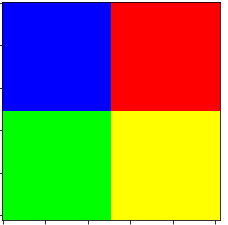
*Hint: Remember channels and color spaces*

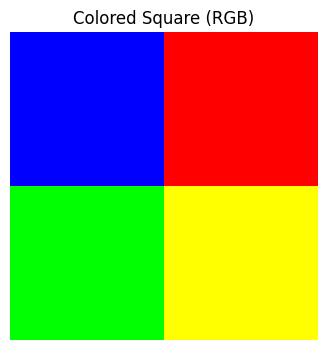

In [8]:
color_img = np.zeros((h, w, 3))

# Red
color_img[:, :, 0] = img1

# Green
color_img[:, :, 1] = img2

# Blue
color_img[:, :, 2] = img3


# VISUALIZATION
plt.figure(figsize=(4,4))
plt.imshow(color_img)
plt.axis("off")
plt.title("Colored Square (RGB)")
plt.show()



### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

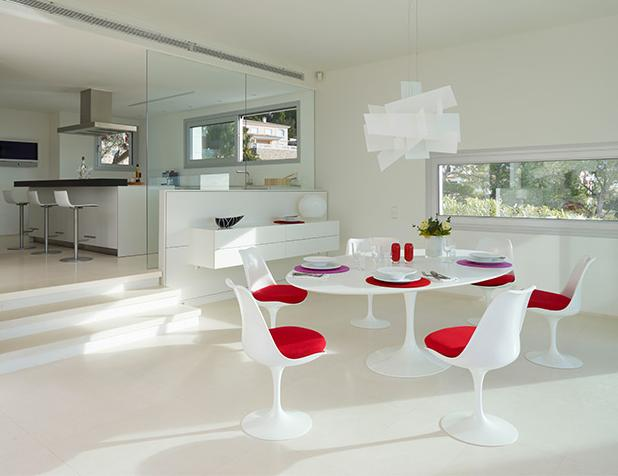

*   Extract individual channels and plot them using matplotlib subplot.



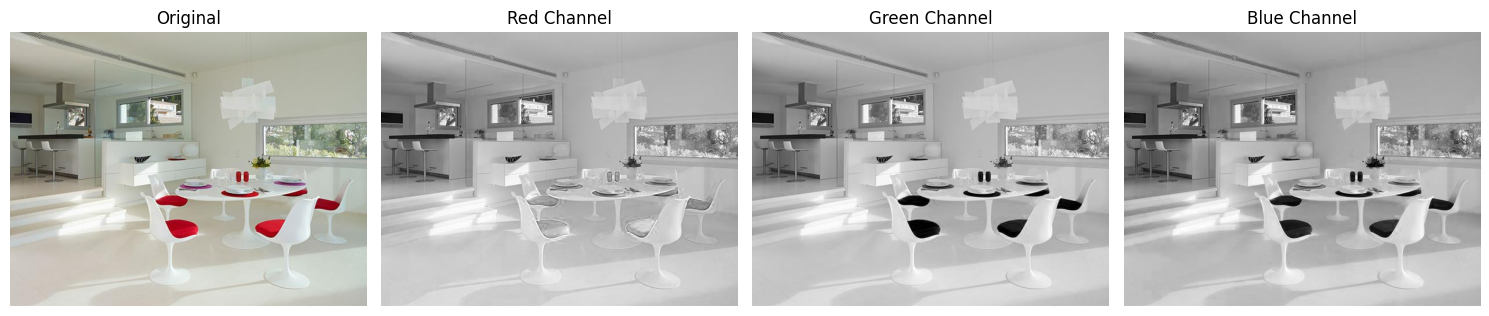

In [ ]:
from PIL import Image


img = Image.open("images/sillas.jpg")
img = np.array(img)

# Chanels
R = img[:, :, 0]  
G = img[:, :, 1]  
B = img[:, :, 2]  

# VISUALIZAtiON
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

# Original image
ax[0].imshow(img)
ax[0].set_title("Original")
ax[0].axis("off")

# Red channel
ax[1].imshow(R, cmap='gray')
ax[1].set_title("Red Channel")
ax[1].axis("off")

# Green channel
ax[2].imshow(G, cmap='gray')
ax[2].set_title("Green Channel")
ax[2].axis("off")

# Blue channel
ax[3].imshow(B, cmap='gray')
ax[3].set_title("Blue Channel")
ax[3].axis("off")

plt.tight_layout()
plt.show()



*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

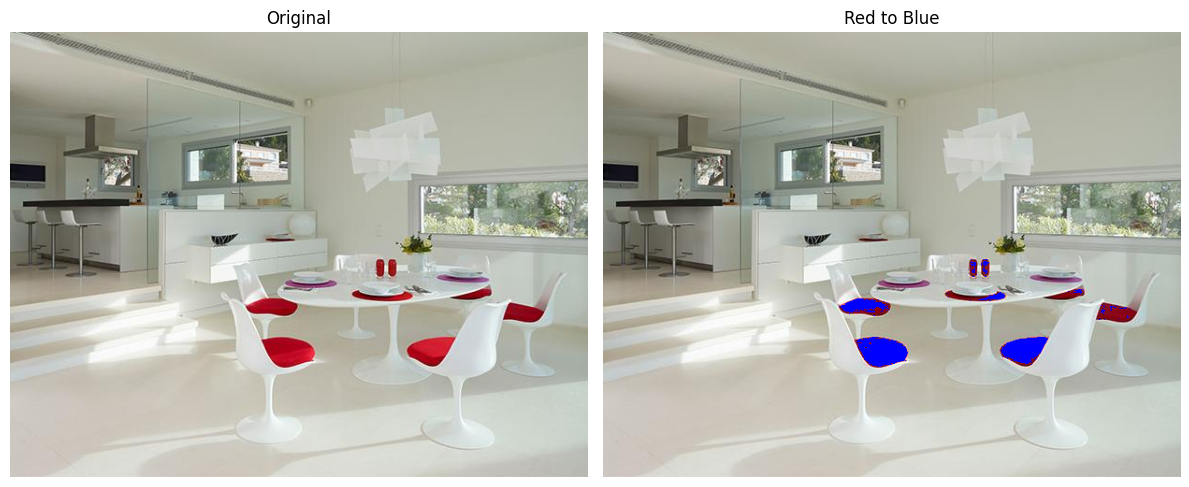

In [11]:
new_img = img.copy()

# detect red pixels

red_mask = (img[:,:,0] > 150) & (img[:,:,1] < 100) & (img[:,:,2] < 100)


# REPLACE RED WITH BLUE

new_img[red_mask] = [0, 0, 255]

# VISUALIZATION

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].imshow(img)
ax[0].set_title("Original")
ax[0].axis("off")

ax[1].imshow(new_img)
ax[1].set_title("Red to Blue")
ax[1].axis("off")

plt.tight_layout()
plt.show()



# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

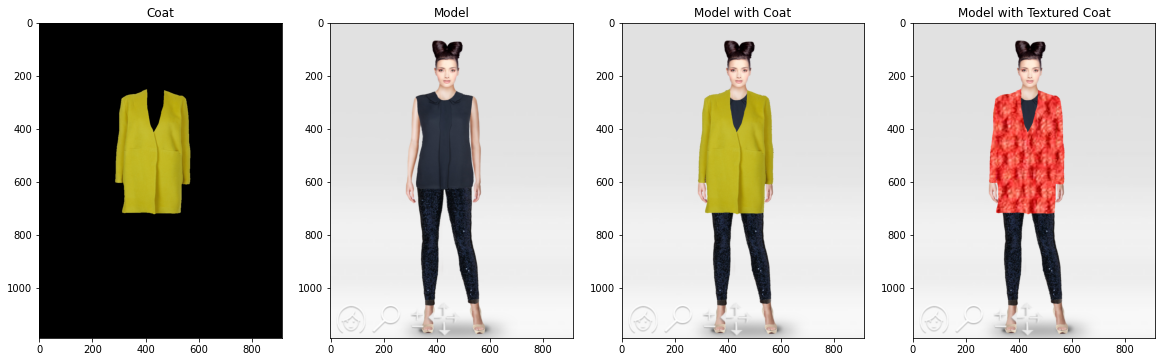

In [16]:
import os
print(os.listdir("images"))

['aquatermi_lowcontrast.jpg', 'coat.png', 'model.png', 'sillas.jpg', 'texture.png', 'texture2.png', 'texture3.jpg']


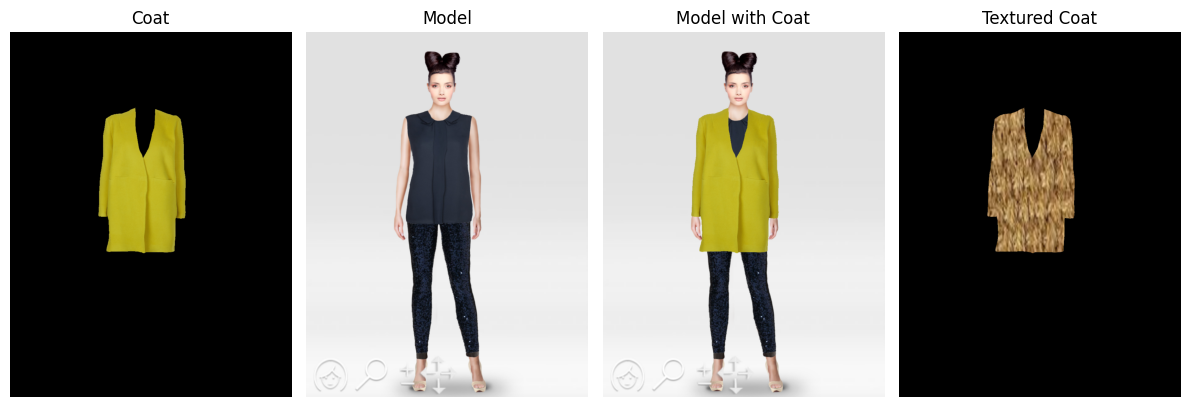

In [20]:
!pip install opencv-python
import cv2

model = cv2.imread("images/model.png")
coat = cv2.imread("images/coat.png")
texture = cv2.imread("images/texture.png")  

# Convert BGR to RGB
model = cv2.cvtColor(model, cv2.COLOR_BGR2RGB)
coat = cv2.cvtColor(coat, cv2.COLOR_BGR2RGB)
texture = cv2.cvtColor(texture, cv2.COLOR_BGR2RGB)



# RESIZE COAT TO MODEL

coat = cv2.resize(coat, (model.shape[1], model.shape[0]))


# CREATE COAT MASK 

gray = cv2.cvtColor(coat, cv2.COLOR_RGB2GRAY)
_, mask = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

mask = mask.astype(bool)


# DRESS COAT 

model_with_coat = model.copy()
model_with_coat[mask] = coat[mask]

# APPLY TEXTURE TO COAT

texture = cv2.resize(texture, (model.shape[1], model.shape[0]))

textured_coat = coat.copy()
textured_coat[mask] = texture[mask]

model_textured = model.copy()
model_textured[mask] = textured_coat[mask]


# VISUALIZATION

images = [coat, model, model_with_coat, textured_coat]
titles = ["Coat", "Model", "Model with Coat", "Textured Coat"]

plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




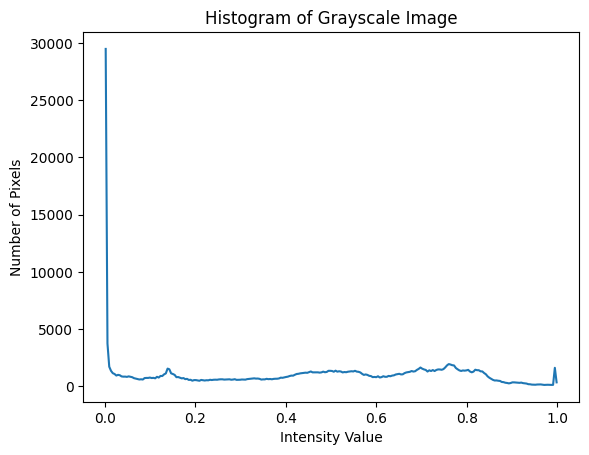

In [22]:
import matplotlib.pyplot as plt
from skimage import data, color, exposure


# 1) Read image

img = data.astronaut()


# 2) Convert to grayscale

gray = color.rgb2gray(img)


# 3)  histogram

hist, bins = exposure.histogram(gray)

# 4) Plot histogram

plt.figure()
plt.plot(bins, hist)
plt.title("Histogram of Grayscale Image")
plt.xlabel("Intensity Value")
plt.ylabel("Number of Pixels")
plt.show()



*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

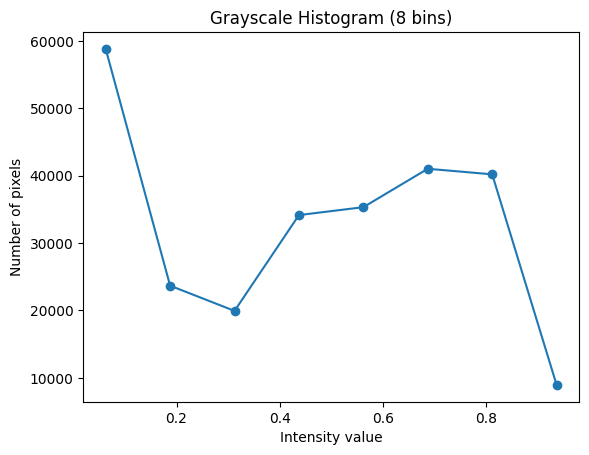

In [23]:
hist, bin_centers = exposure.histogram(gray, nbins=8)


plt.figure()
plt.plot(bin_centers, hist, marker='o')
plt.title("Grayscale Histogram (8 bins)")
plt.xlabel("Intensity value")
plt.ylabel("Number of pixels")
plt.show()





*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

Changing the bin count is like changing the zoom level, When you change the number of bins, you change how intensities are grouped. With many bins, each bin represents a very narrow range of gray levels. With few bins, each bin lumps many intensities of gray together.
With a small number of bins, the histogram becomes smooth and simple. With a large number of bins, the histogram becomes detailed and jagged.Low bins emphasize global structure. High bins emphasize local detail and noise.

...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


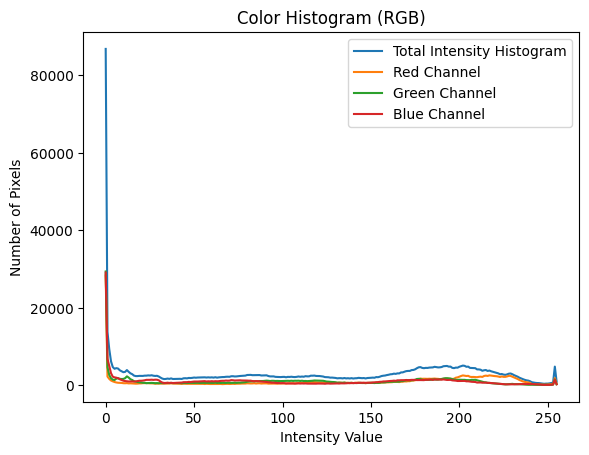

In [25]:

R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]

# 1) histogram for each channel
hist_r, bins_r = exposure.histogram(R)
hist_g, bins_g = exposure.histogram(G)
hist_b, bins_b = exposure.histogram(B)

# 2) flatten all channels
all_pixels = img.reshape(-1)
hist_total, bins_total = exposure.histogram(all_pixels, nbins=10)

# 3) Plot histograms

plt.figure()

plt.plot(bins_total, hist_total, label="Total Intensity Histogram")
plt.plot(bins_r, hist_r, label="Red Channel")
plt.plot(bins_g, hist_g, label="Green Channel")
plt.plot(bins_b, hist_b, label="Blue Channel")

plt.title("Color Histogram (RGB)")
plt.xlabel("Intensity Value")
plt.ylabel("Number of Pixels")
plt.legend()
plt.show()


### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



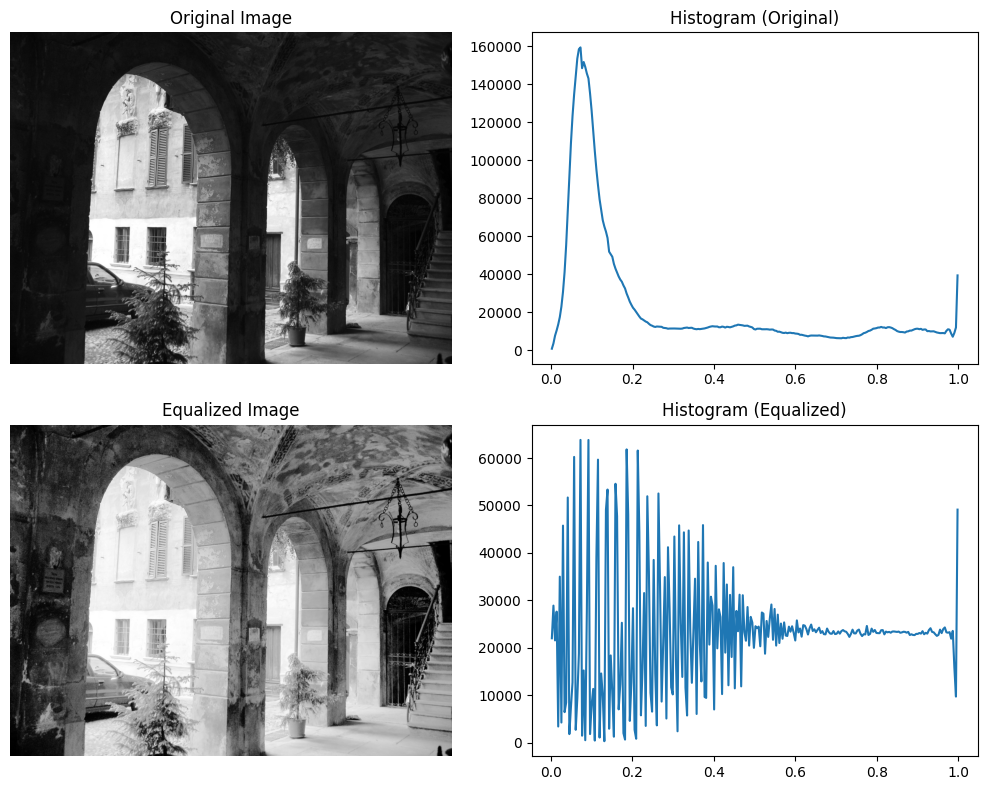

In [27]:
# 1) Read image
img = io.imread("images/aquatermi_lowcontrast.jpg")

# 2) Convert to grayscale
gray = color.rgb2gray(img)
# 3) Compute original histogram
hist_original, bins_original = exposure.histogram(gray)

# 4) Perform histogram equalization
equalized = exposure.equalize_hist(gray)

# 5) Compute equalized histogram
hist_eq, bins_eq = exposure.histogram(equalized)

# 6) Show results (2x2 subplot)
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.plot(bins_original, hist_original)
plt.title("Histogram (Original)")

plt.subplot(2, 2, 3)
plt.imshow(equalized, cmap='gray')
plt.title("Equalized Image")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.plot(bins_eq, hist_eq)
plt.title("Histogram (Equalized)")

plt.tight_layout()
plt.show()



*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**
it shows how often each intensity occurs.
The histogram becomes more uniform.
Contrast is boosted locally, not just globally.
Brightness relationships change.
Visual details in mid-tones are more noticeble



...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



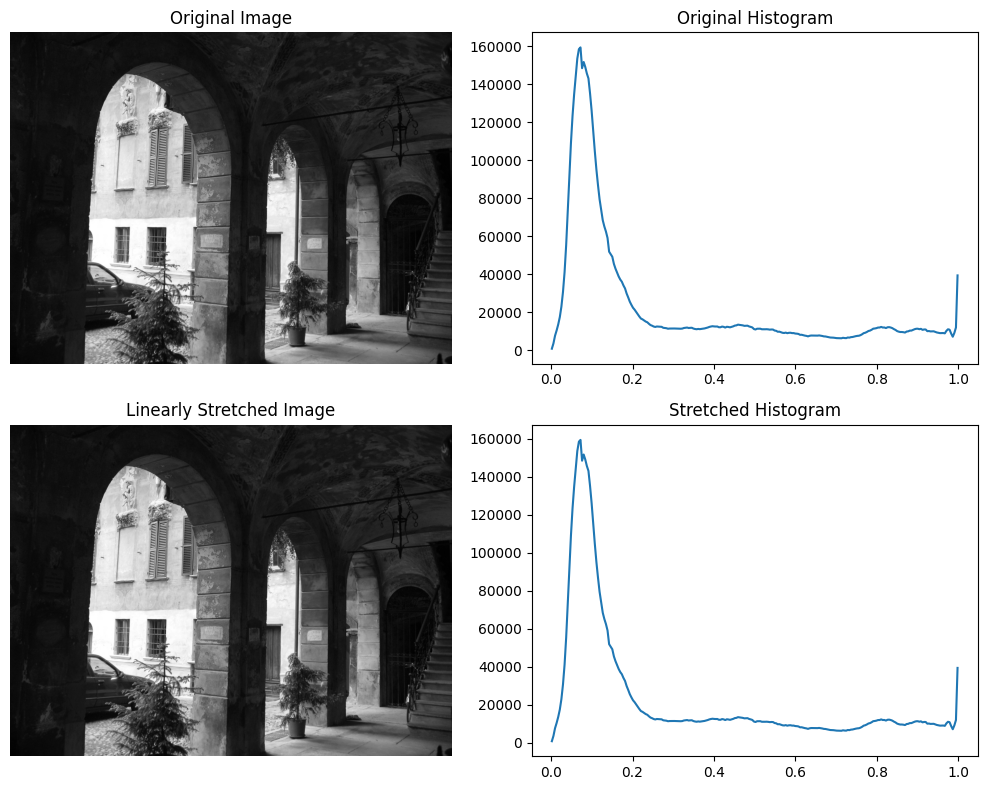

In [28]:

# 1) Linear contrast stretch function
def linear_contrast_stretch(gray_img, bins=256):
    img = gray_img.astype(float)

    min_val = img.min()
    max_val = img.max()

    stretched = (img - min_val) / (max_val - min_val)

    stretched = np.clip(stretched, 0, 1)
    return stretched


# 2) Read image
img = io.imread("images/aquatermi_lowcontrast.jpg")

# 3) Convert to grayscale
gray = color.rgb2gray(img)

# 4) Apply linear contrast stretch
enhanced = linear_contrast_stretch(gray, bins=256)

# 5) Histograms
hist_orig, bins_orig = exposure.histogram(gray, nbins=256)
hist_enh, bins_enh = exposure.histogram(enhanced, nbins=256)

# 6) Visualization (2x2 subplot)
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.plot(bins_orig, hist_orig)
plt.title("Original Histogram")

plt.subplot(2, 2, 3)
plt.imshow(enhanced, cmap='gray')
plt.title("Linearly Stretched Image")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.plot(bins_enh, hist_enh)
plt.title("Stretched Histogram")

plt.tight_layout()
plt.show()




# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




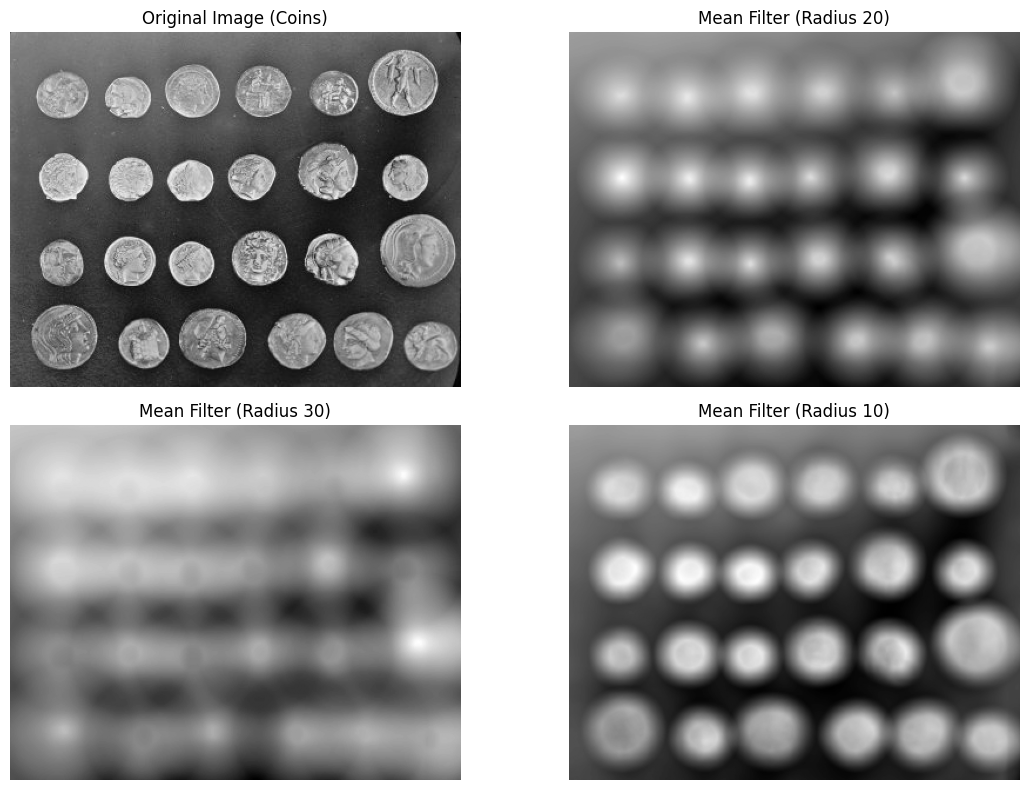

In [31]:
from skimage import data, filters, morphology, img_as_ubyte
# 1) Load coins image
coins = data.coins()

# Rank filters require uint8 image
coins = img_as_ubyte(coins)

# 2) Define structuring elements
selem_20 = morphology.disk(20)
selem_30 = morphology.disk(30)
selem_10 = morphology.disk(10)

# 3) Apply mean filter
mean_20 = filters.rank.mean(coins, selem_20)
mean_30 = filters.rank.mean(coins, selem_30)
mean_10 = filters.rank.mean(coins, selem_10)

# 4) Visualization
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(coins, cmap='gray')
plt.title("Original Image (Coins)")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(mean_20, cmap='gray')
plt.title("Mean Filter (Radius 20)")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(mean_30, cmap='gray')
plt.title("Mean Filter (Radius 30)")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(mean_10, cmap='gray')
plt.title("Mean Filter (Radius 10)")
plt.axis("off")

plt.tight_layout()
plt.show()


*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

C:\Users\vigus\AppData\Local\Temp\ipykernel_3260\1948755489.py:2: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  square = morphology.square(25)
C:\Users\vigus\AppData\Local\Temp\ipykernel_3260\1948755489.py:3: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  rectangle = morphology.rectangle(15, 35)


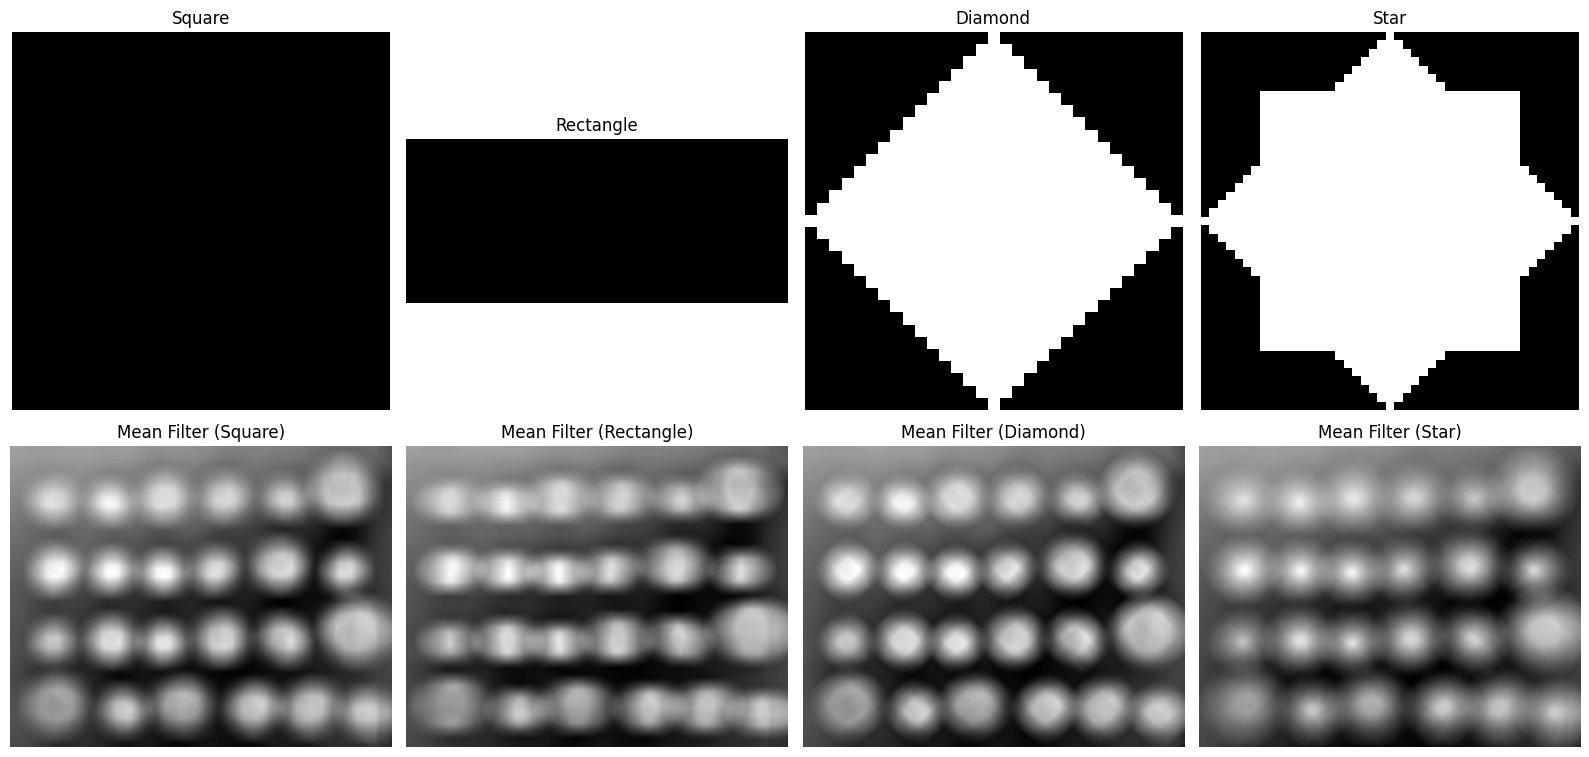

In [ ]:
# 2) Create different structuring elements
square = morphology.square(25)
rectangle = morphology.rectangle(15, 35)
diamond = morphology.diamond(15)
star = morphology.star(15)

selems = [square, rectangle, diamond, star]
names = ["Square", "Rectangle", "Diamond", "Star"]

# 3) Apply mean filter
filtered_images = [filters.rank.mean(coins, s) for s in selems]

# 4) Visualization 
n = len(selems)
plt.figure(figsize=(4*n, 8))

for i in range(n):
    # structuring element
    plt.subplot(2, n, i+1)
    plt.imshow(selems[i], cmap='gray')
    plt.title(names[i])
    plt.axis("off")

    # filtered image
    plt.subplot(2, n, i+n+1)
    plt.imshow(filtered_images[i], cmap='gray')
    plt.title(f"Mean Filter ({names[i]})")
    plt.axis("off")

plt.tight_layout()
plt.show()



*   How does changing the radius of disk affect the smoothing functionality?

**Solution**
Smaller radius:
Each pixel only averages with very close neighbors.
The smoothing is gentle.

Larger radius:
Each pixel averages with a much bigger circle of neighbors.
The smoothing becomes strong and global.
Small structures disappear.



...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

Square: Textures disappear evenly in X and Y.

Rectangle: it wide horizontally, The image develops a motion-blur

Diamond: The edges are sharper, it becomes more geometric

Star: It looks isotropic, some lines mantain and others vanish.

...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

The mean filter replaces each pixel in the neighborhood counts the same
Edges are crossed.
strong blurr.


In the gaussian filter neighboring pixels contribute more than distant ones.
Blur is isotropic.
edges soften.


Uses of mean filter: Deal with noise, flatten detail, no need for visual fidelity.
Uses for gaussian filter: image quality matters, natural blurr, edge detection.

...